# Support Vector Machines

In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datasets. Experimenting with these datasets
will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline

We will begin with loading and visualising example 2D dataset which can be separated by a linear boundary.

In [2]:
data_arr = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex6data1.mat')

X = data_arr['X']
y = data_arr['y']

data_arr

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

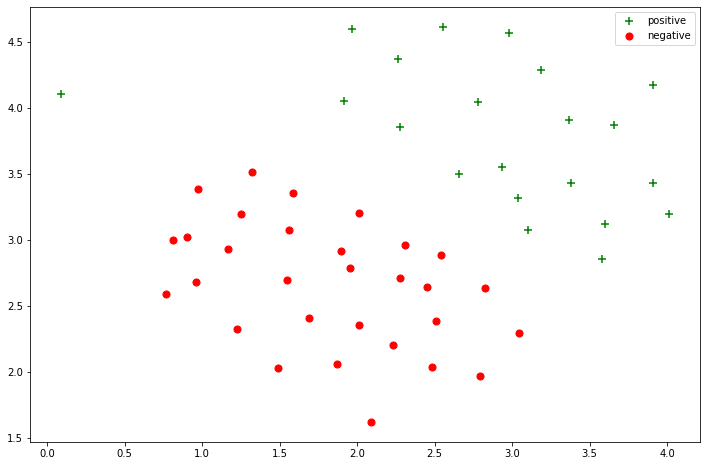

In [3]:
# Convert to dataframe to format data before plotting
data = pd.DataFrame(X, columns=['x1', 'x2'])
data['y'] = y

pos = data[data['y'].isin([1])]
neg = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos['x1'], pos['x2'], c='green', s=50, marker='+', label='positive')
ax.scatter(neg['x1'], neg['x2'], c='red', s=50, marker='o', label='negative')
ax.legend()

In this part of the exercise, we will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role
similar to 1/lambda, where lambda is the regularization parameter that we were using
previously for logistic regression.
Implementation of an SVM algorithm is not part of this exercises so I can use the one from scikit-learn.
I will also plot a decision boundary for each chosen C following an example from scikit-learn website: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

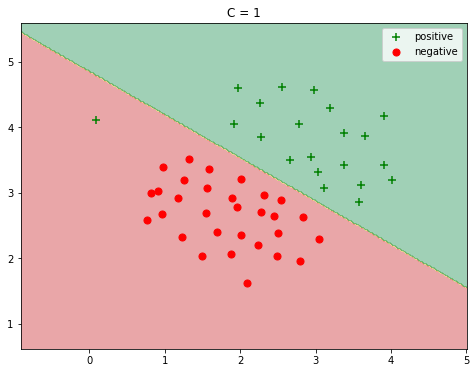

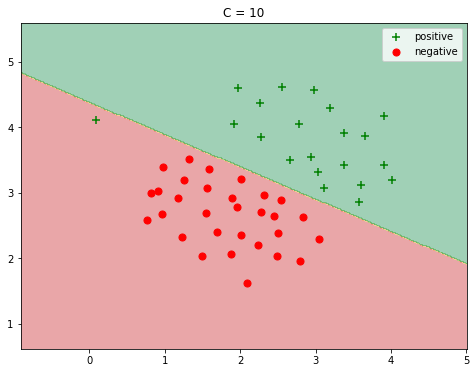

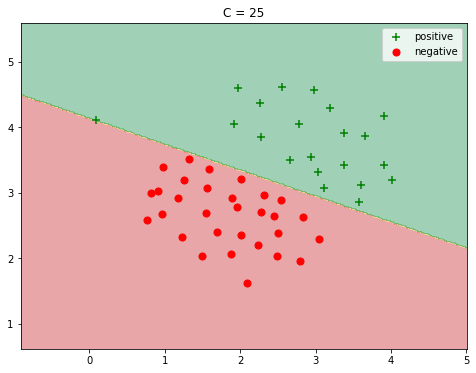

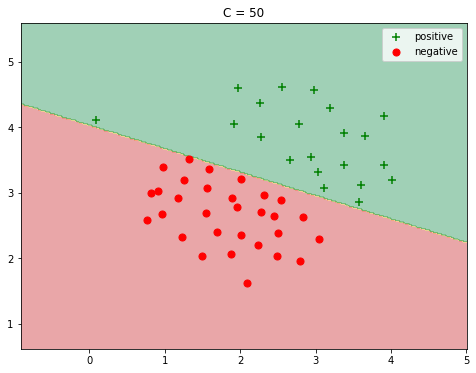

In [4]:
C_params = [1, 10, 25, 50] # SVM regularization parameters

# Create a mesh to plot in
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['C = 1', 'C = 10', 'C = 25', 'C = 50']

for i, c in enumerate(C_params):
    
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(data[['x1', 'x2']], data['y'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure(figsize=(8,6))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='RdYlGn', alpha=0.4)

    # Plot also the training points
    plt.scatter(pos['x1'], pos['x2'], c='green', s=50, marker='+', label='positive')
    plt.scatter(neg['x1'], neg['x2'], c='red', s=50, marker='o', label='negative')
    plt.title(titles[i])
    plt.legend()

As we can see from above plots when C = 1, we find that the SVM puts the decision boundary in the gap between the two datasets and 'misclassifies' the data point on the far left. As we increase the value of C the obtained decision boundary fits the training data much better. However, looking at the distribution of the datapoints we can deduce that our model probably overfits our data.

# SVM with Gaussian Kernels

In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.



Let's load and visualize our next dataset


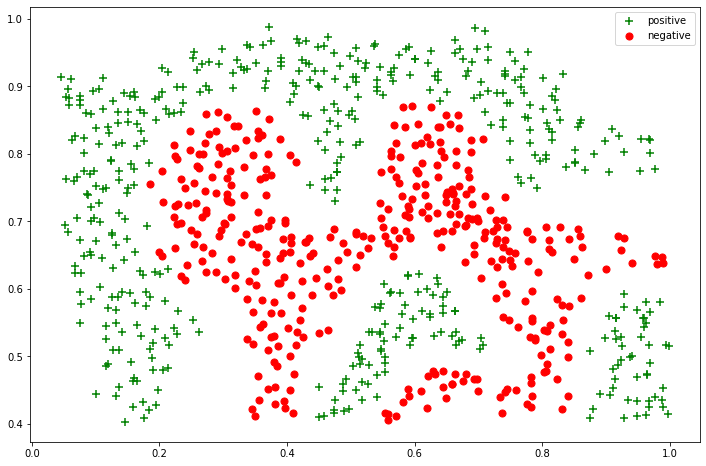

In [5]:
data_arr_2 = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex6data2.mat')

X = data_arr_2['X']
y = data_arr_2['y']

# Convert to dataframe to format data before plotting
data_2 = pd.DataFrame(X, columns=['x1', 'x2'])
data_2['y'] = y

pos_2 = data_2[data_2['y'].isin([1])]
neg_2 = data_2[data_2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos_2['x1'], pos_2['x2'], c='green', s=50, marker='+', label='positive')
ax.scatter(neg_2['x1'], neg_2['x2'], c='red', s=50, marker='o', label='negative')
ax.legend()

From
the figure, we can obserse that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, we will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

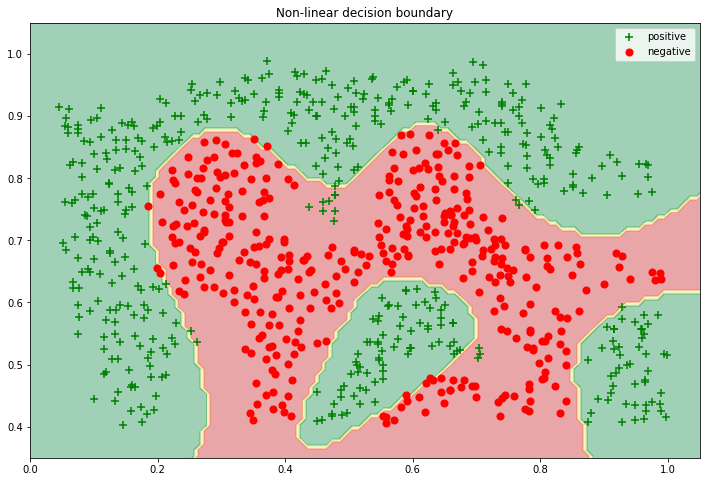

In [6]:
C=100
gamma=10
svc = svm.SVC(kernel='rbf', C=C, gamma=gamma)
svc.fit(data_2[['x1', 'x2']], data_2['y'])

# Create a mesh to plot in
h = .01  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(12,8))
plt.xlim(left=0)
plt.xlim(right=1.05)
plt.ylim(top=1.05)
plt.ylim(bottom=0.35)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdYlGn', alpha=0.4)

# Plot also the training points
plt.scatter(pos_2['x1'], pos_2['x2'], c='green', s=50, marker='+', label='positive')
plt.scatter(neg_2['x1'], neg_2['x2'], c='red', s=50, marker='o', label='negative')
plt.title('Non-linear decision boundary')
plt.legend()

# Example Dataset 3

In this part of the exercise, we will gain more practical skills on how to use
a SVM with a Gaussian kernel. We will load and display the third dataset. We will be using the SVM with the Gaussian
kernel with this dataset.
In the provided dataset, we are given the variables X,
y, Xval, yval. 
Our task is to use the cross validation set Xval, yval to determine the
best C and gamma parameter to use. We should write the code nec-
essary to help us search over the parameters C and gamma. For both C and gamma, we
will trying values in multiplicative steps (e.g., 0:01; 0:03; 0:1; 0:3; 1; 3; 10; 30).



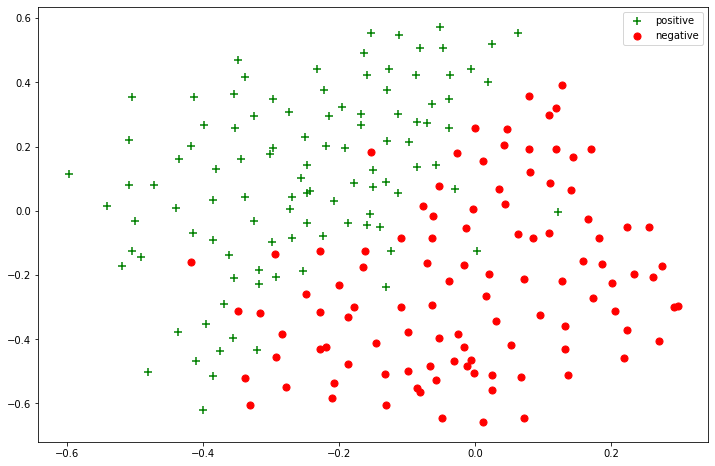

In [7]:
data_arr_3 = loadmat(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex6data3.mat')

X = data_arr_3['X']
X_val = data_arr_3['Xval']
y = data_arr_3['y'].ravel()
y_val = data_arr_3['yval'].ravel()

# Convert to dataframe to format data before plotting
data_3 = pd.DataFrame(X, columns=['x1', 'x2'])
data_3['y'] = y

pos_3 = data_3[data_3['y'].isin([1])]
neg_3 = data_3[data_3['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos_3['x1'], pos_3['x2'], c='green', s=50, marker='+', label='positive')
ax.scatter(neg_3['x1'], neg_3['x2'], c='red', s=50, marker='o', label='negative')
ax.legend()

We will now find optimal C and gamma parameters based on cross-validation set performance. Following the exercise, we will implement this searching from scratch, instead of using scikit-learn's grid search.

In [8]:
C_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

best_score = 0
params = {'C':None, 'gamma':None}

for c in C_list:
    for g in gamma_list:
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X, y)
        score = svc.score(X_val, y_val)

        if (score > best_score):
            best_score = score 
            params['C'] = c
            params['gamma'] = g

best_score, params

(0.965, {'C': 3, 'gamma': 30})

As we can see our optimal parameters are C=3 and gamma=30. Now we can plot a decision boundary for our best parameters.

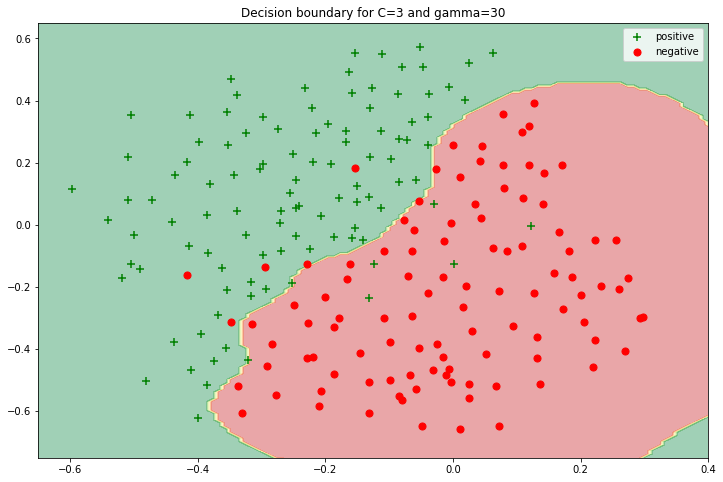

In [9]:
# Create a mesh to plot in
h = .01  # step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(12,8))
plt.xlim(left=-0.65)
plt.xlim(right=0.4)
plt.ylim(top=0.65)
plt.ylim(bottom=-0.75)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdYlGn', alpha=0.4)

# Plot also the training points
plt.scatter(pos_3['x1'], pos_3['x2'], c='green', s=50, marker='+', label='positive')
plt.scatter(neg_3['x1'], neg_3['x2'], c='red', s=50, marker='o', label='negative')
plt.title('Decision boundary for C=3 and gamma=30')
plt.legend()